In [151]:
#  import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [152]:
# suppress warnings for clean notebook
import warnings 
warnings.filterwarnings("ignore")

#### We'll use the Melbourne House Price Dataset to predict house prices based on various features.

https://www.kaggle.com/anthonypino/melbourne-housing-market

In [153]:
# read dataset 
dataset=pd.read_csv("Melbourne_housing_FULL.csv")
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [154]:
# how many unique types of data collections   
dataset.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [155]:
dataset.shape

(34857, 21)

In [156]:
feature_NaN= [features for features  in dataset.columns if dataset[features].isnull().sum()>1]


for feature in feature_NaN:
    print(feature,np.round(dataset[feature].isnull().mean(),4),'% missing values')

Price 0.2183 % missing values
Bedroom2 0.2357 % missing values
Bathroom 0.236 % missing values
Car 0.2504 % missing values
Landsize 0.3388 % missing values
BuildingArea 0.6058 % missing values
YearBuilt 0.5539 % missing values
CouncilArea 0.0001 % missing values
Lattitude 0.2288 % missing values
Longtitude 0.2288 % missing values
Regionname 0.0001 % missing values
Propertycount 0.0001 % missing values


There are many missing values, we need to find the relationship between missing values and Sale Price 

let's plot some diagram for this relationship

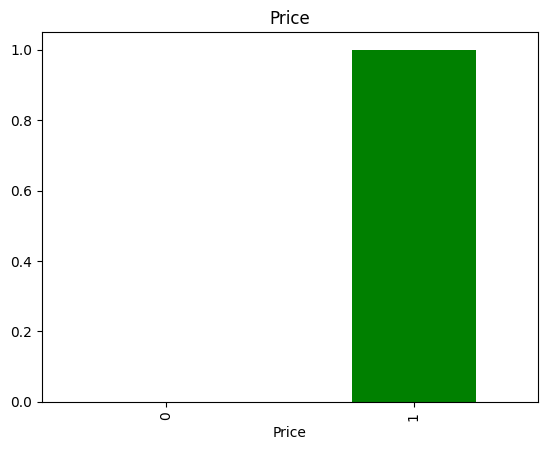

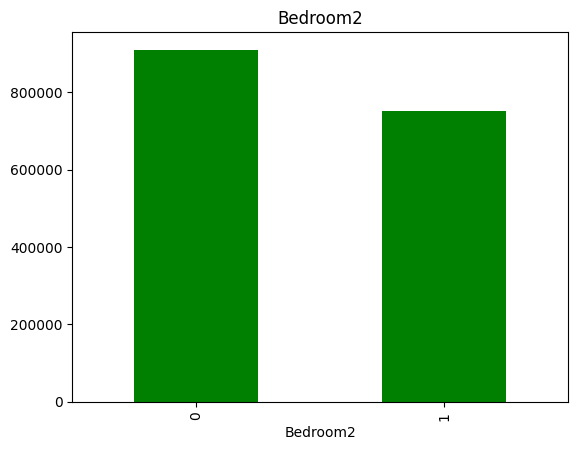

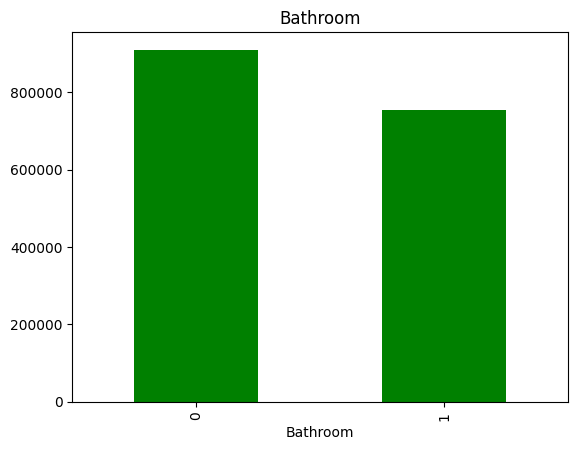

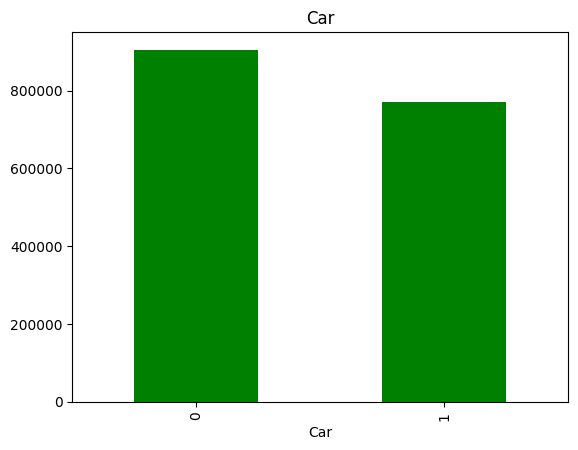

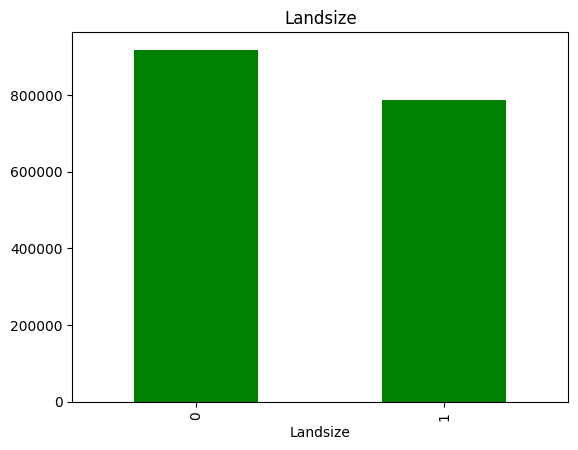

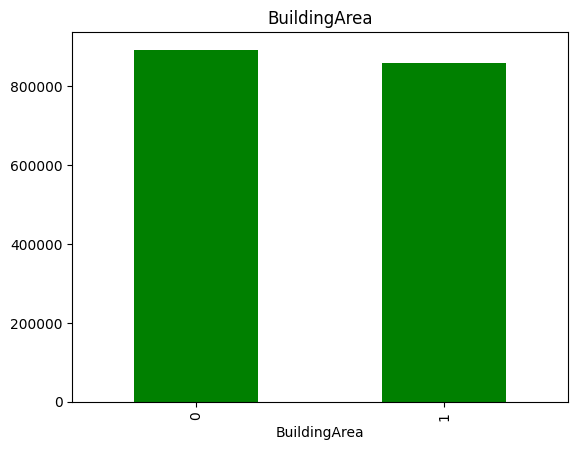

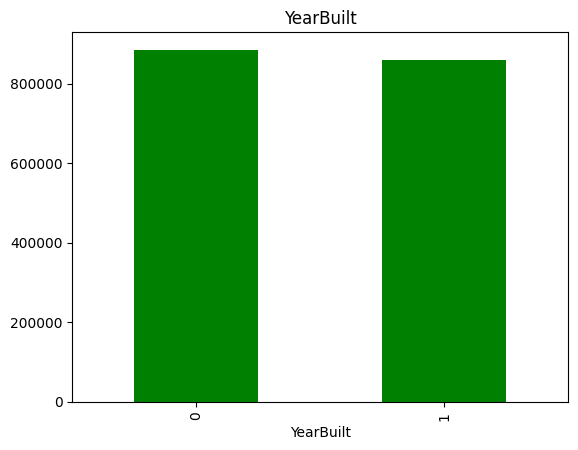

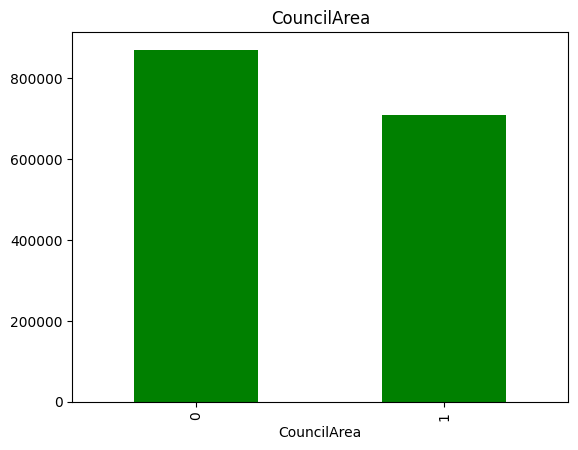

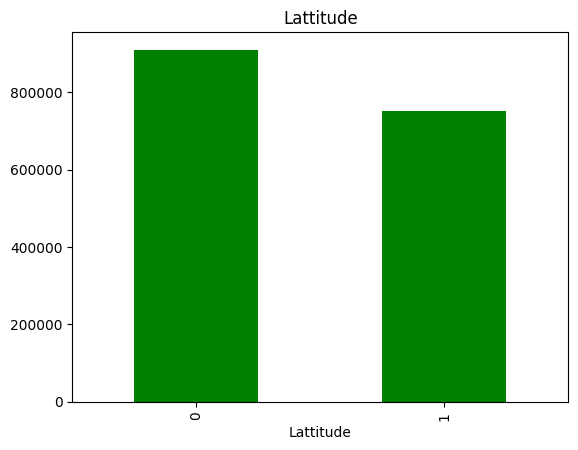

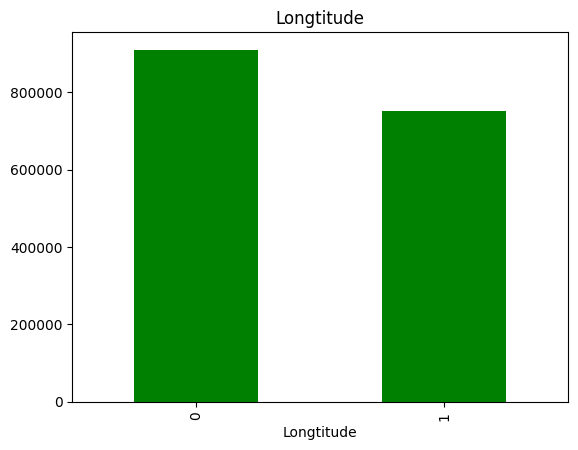

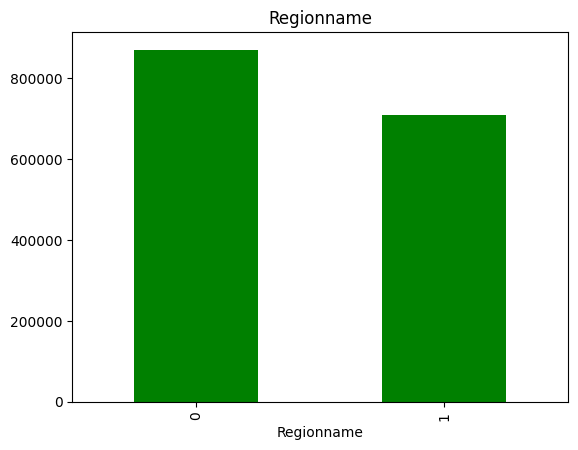

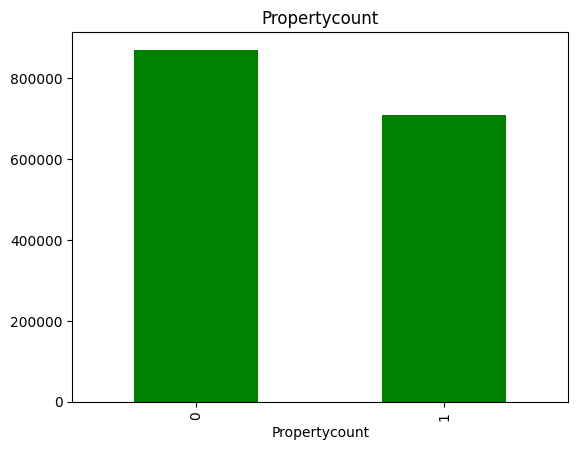

In [157]:
for feature in feature_NaN:
    data=dataset.copy()

    # lets make a var that indicates 1 if the observation missing or zero otherwise
    data[feature]=np.where(data[feature].isnull(),1,0)

    # lets calculate the mean salprice where the info is missing or present
    data.groupby(feature)['Price'].median().plot.bar(color='g')
    plt.title(feature)
    plt.show()

### Checking for Nan values

In [158]:
# let's use limited columns which makes more sense for serving our purpose
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount',  'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [159]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

### Handling Missing values

In [160]:
cols_fill_zero=['Propertycount','Distance','Bedroom2','Bathroom','Car']
dataset[cols_fill_zero]=dataset[cols_fill_zero].fillna(0)

In [161]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        0
Distance             0
CouncilArea          3
Bedroom2             0
Bathroom             0
Car                  0
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

there have also sum null value , we fill them by using mean value 

In [162]:
dataset['Landsize']=dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea']=dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

dataset.head()


,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,160.2564,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,160.2564,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0000,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,160.2564,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0000,1465000.0


In [163]:
dataset.isna().sum()

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

### Drop NA values of Price, since it's our predictive variable we won't impute it

In [164]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

A dummy variable is a binary variable coded as 1 or 0 to represent the presence or absence of a variable

### Let's one hot encode the categorical features


In [165]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset = dataset.astype(int)
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019,2,2,1,1,202,160,1480000,0,...,0,0,0,0,0,0,0,0,1,0
2,2,4019,2,2,1,0,156,79,1035000,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4019,2,3,2,0,134,150,1465000,0,...,0,0,0,0,0,0,0,0,1,0
5,3,4019,2,3,2,1,94,160,850000,0,...,0,0,0,0,0,0,0,0,1,0
6,4,4019,2,3,1,2,120,142,1600000,0,...,0,0,0,0,0,0,0,0,1,0


now i need x and y ->dependent and independent var


In [166]:
x=dataset.drop('Price',axis=1)
y=dataset['Price']


In [167]:
from sklearn.model_selection import train_test_split

tr_X,ts_X,tr_y,ts_y=train_test_split(x,y,test_size=0.3,random_state=2)


In [168]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(tr_X,tr_y)


In [169]:
reg.score(ts_X,ts_y)

0.13413168587394453

In [170]:
reg.score(tr_X,tr_y)

0.6825862950046448

There ,we see that there have low score in testing data and high score in training data, so this is an overfitting model ,

This means the model performs well on training data but struggles to make accurate predictions on testing data.

### L1 regression for preventing overfitting

In [171]:
from sklearn import linear_model

lasso_reg=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)

lasso_reg.fit(tr_X,tr_y)




Lasso(alpha=50, max_iter=100, tol=0.1)

In [172]:
lasso_reg.score(ts_X,ts_y)

0.6633169721521481

### L2 regression for preventing overfiting

In [173]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=50,max_iter=100,tol=0.1)
ridge_reg.fit(tr_X,tr_y)


Ridge(alpha=50, max_iter=100, tol=0.1)

In [174]:
ridge_reg.score(ts_X,ts_y)

0.6669747759118698

In [175]:
from math import ceil
print(ceil(0.6669747759118698*100),"%")

67 %


finally we see that 67% predictions produces accurate result 

### Description
Lasso and Ridge regularizations can be very helpful when a Simple Linear Regression model starts to overfit. While the improvements might not always be dramatic, they’re usually quite noticeable. Interestingly, both L1 and L2 regularizations aren’t just for regression—they’re also used in Neural Networks to help keep them from overfitting and ensure they perform well on new data.